# KNN ALGORITHM

In [1]:
from sklearn.datasets.samples_generator import make_blobs
import numpy as np
import matplotlib.pyplot as plt
import math
from collections import Counter
%matplotlib inline

In [2]:
(X, y) = make_blobs(n_samples =100,
                   n_features = 2,
                   centers = 2,
                   cluster_std = 7,
                   random_state =7
                  )

In [3]:
(i,j) = X[:,0],X[:,1]

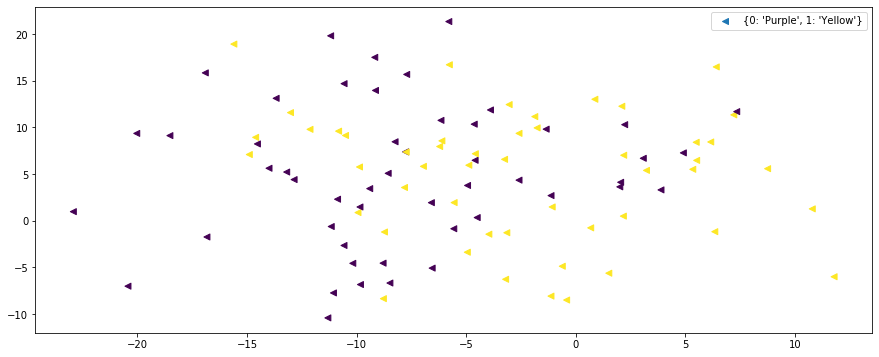

In [48]:
label = {0 :"Purple",1 :"Yellow" }
plt.figure(figsize=(15,6))
plt.scatter(i,j,marker='<',c=y,label=label)
plt.legend()

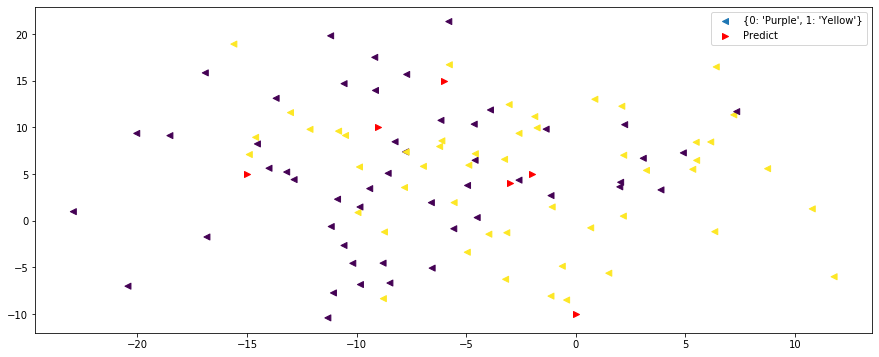

In [49]:
prediction_points = [[-6,15],[-3,4],[-15,5,],[-2,5],[-9,10],[0,-10]]
prediction_points = np.array(prediction_points)

plt.figure(figsize=(15,6))
plt.scatter(i,j,marker='<',c=y,label=label)
plt.scatter(prediction_points[:,0],prediction_points[:,1],marker ='>',c='r',label='Predict')
plt.legend()

In [39]:
def get_eculidean_distance(point,k):
    euc_distance = np.sqrt(np.sum((X-point)**2, axis =1))
    return np.argsort(euc_distance)[0:k]

In [40]:
def predict(prediction_points, k):
    points_labels = []
    
    for point in prediction_points:
        distances = get_eculidean_distance(point,k)
        
        results =[]
        for index in distances:
            results.append(y[index])
            
        label = Counter(results).most_common(1)
        points_labels.append([point,label[0][0]])
        
    return points_labels

In [41]:
results = predict(prediction_points,3)
results

[[array([-6, 15]), 0],
 [array([-3,  4]), 0],
 [array([-15,   5]), 0],
 [array([-2,  5]), 0],
 [array([-9, 10]), 1],
 [array([  0, -10]), 1]]

In [142]:
results = predict(X,3)
predictions = []
for result in results:
    predictions.append(result[1])
print(predictions)

[0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0]


In [143]:
y

array([0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1])

In [144]:
def get_accuracy(predicitions):
    error = np.sum((predicitions-y)**2)
    accuracy = 100 -(error/len(y))*100
    return accuracy

In [145]:
acc = []
for k in range(1, 10):
    results = predict(X,k)
    predicitions =[]
    for result in results:
        predicitions.append(result[1])
    acc.append([get_accuracy(predicitions), k])

Text(0, 0.5, 'accuracy')

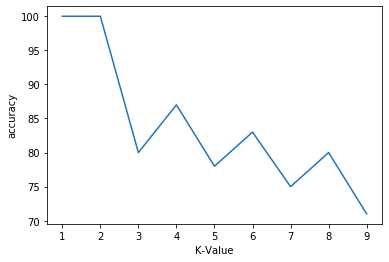

In [146]:
plotx = []
ploty = []
for a in acc:
    plotx.append(a[1])
    ploty.append(a[0])
    
plt.plot(plotx, ploty)
plt.xlabel("K-Value")
plt.ylabel("accuracy")